# Comp541 - Data Mining Group 1 Project

### By Rahi Misra, Bum Jun Cho, Clifford Choi, Hitesh Manapragada, Himanshu Kumar, Gino Vitug

## Team members who are NOT working on the Data Cleaning should NOT RUN THIS CODE FROM THE TOP! SCROLL DOWN TO "Statistical Descriptions" section and start running the code from there!

*   Data Cleaning: Bum Jun Cho, Clifford Choi, Hitesh Manapragada
*   Statistical Descriptions report and presentation: Rahi Misra, Himanshu Kumar, Gino Vitug

## Data Loading and Describe

In [ ]:
# Load essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing

# Load Google Drive for Collaboration environment
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Load Data
train_df = pd.read_csv('/content/drive/MyDrive/')


In [ ]:
# First 5 lines of Original Data
train_df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,9ca0e81111c683bec1012473feefd28f,4/16/2022,4/17/2022,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,1650223560,2022-04-17T15:26:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,8940,947,coach
1,98685953630e772a098941b71906592b,4/16/2022,4/17/2022,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650200400,2022-04-17T09:00:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9000,947,coach
2,98d90cbc32bfbb05c2fc32897c7c1087,4/16/2022,4/17/2022,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650218700,2022-04-17T14:05:00.000-04:00,BOS,ATL,Delta,DL,Boeing 757-200,9000,947,coach
3,969a269d38eae583f455486fa90877b4,4/16/2022,4/17/2022,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,...,1650227460,2022-04-17T16:31:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9120,947,coach
4,980370cf27c89b40d2833a1d5afc9751,4/16/2022,4/17/2022,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,...,1650213180,2022-04-17T12:33:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9240,947,coach


In [ ]:
# Basic statistics regarding the data set
train_df.describe()

,elapsedDays,baseFare,totalFare,seatsRemaining,totalTravelDistance
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,983821.000000
mean,1.466276e-01,3.012577e+02,3.494361e+02,5.656128e+00,1578.122635
std,3.537398e-01,2.194851e+02,2.356247e+02,2.953544e+00,836.599299
min,0.000000e+00,5.100000e+00,2.397000e+01,0.000000e+00,97.000000
25%,0.000000e+00,1.618600e+02,1.986000e+02,3.000000e+00,872.000000
50%,0.000000e+00,2.641900e+02,3.086000e+02,7.000000e+00,1398.000000
75%,0.000000e+00,3.925500e+02,4.471000e+02,8.000000e+00,2353.000000
max,2.000000e+00,3.531160e+03,3.810600e+03,1.000000e+01,3958.000000


In [ ]:
# Information about columns, data types, and null values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 27 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   legId                              1048575 non-null  object 
 1   searchDate                         1048575 non-null  object 
 2   flightDate                         1048575 non-null  object 
 3   startingAirport                    1048575 non-null  object 
 4   destinationAirport                 1048575 non-null  object 
 5   fareBasisCode                      1048575 non-null  object 
 6   travelDuration                     1048575 non-null  object 
 7   elapsedDays                        1048575 non-null  int64  
 8   isBasicEconomy                     1048575 non-null  bool   
 9   isRefundable                       1048575 non-null  bool   
 10  isNonStop                          1048575 non-null  bool   
 11  baseFare                

In [ ]:
# (Number of Rows, Columns)
train_df.shape

(1048575, 27)

In [ ]:
# Count of unique values for each column
train_df.nunique()

legId                                594247
searchDate                                3
flightDate                               61
startingAirport                          16
destinationAirport                       16
fareBasisCode                          4575
travelDuration                         1307
elapsedDays                               3
isBasicEconomy                            2
isRefundable                              2
isNonStop                                 2
baseFare                               7948
totalFare                             14764
seatsRemaining                           11
totalTravelDistance                    2181
segmentsDepartureTimeEpochSeconds    433254
segmentsDepartureTimeRaw             468750
segmentsArrivalTimeEpochSeconds      481266
segmentsArrivalTimeRaw               513143
segmentsArrivalAirportCode             3143
segmentsDepartureAirportCode           3133
segmentsAirlineName                      98
segmentsAirlineCode             

In [ ]:
# Number of empty values for totalTravelDistance
train_df['totalTravelDistance'].isnull().sum()

64754

In [ ]:
# Dropping empty values from table
train_df = train_df.dropna(subset=['totalTravelDistance'])

## Data Preprocessing
- Drop obvious non-related feature
- issues) Large size dataset(cannot be loaded on to Google Colab, and Lack of Industry Experts, so we are dropping some more features that seems to be non-related to our project so we can continue working on it


In [ ]:
# dropping features: legId, fareBasisCode, totalFare, segmentsDepartureTimeEpochSeconds, segmentsArrivalTimeEpochSeconds, segmentsAirlineName, segmentsEquipmentDescription, segmentsDurationInSeconds, segmentsDistance, segmentsCabinCode
droplist = ['legId','fareBasisCode','totalFare','segmentsDepartureTimeEpochSeconds',
            'segmentsArrivalTimeEpochSeconds','segmentsAirlineName','segmentsEquipmentDescription',
            'segmentsDurationInSeconds','segmentsDistance','segmentsCabinCode']
train_df.drop(droplist,axis=1,inplace=True)

In [ ]:
# Checking Edited Data
train_df.head()

,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineCode
0,4/16/2022,4/17/2022,ATL,BOS,PT2H29M,0,False,False,True,217.67,9,947.0,2022-04-17T12:57:00.000-04:00,2022-04-17T15:26:00.000-04:00,BOS,ATL,DL
1,4/16/2022,4/17/2022,ATL,BOS,PT2H30M,0,False,False,True,217.67,4,947.0,2022-04-17T06:30:00.000-04:00,2022-04-17T09:00:00.000-04:00,BOS,ATL,DL
2,4/16/2022,4/17/2022,ATL,BOS,PT2H30M,0,False,False,True,217.67,9,947.0,2022-04-17T11:35:00.000-04:00,2022-04-17T14:05:00.000-04:00,BOS,ATL,DL
3,4/16/2022,4/17/2022,ATL,BOS,PT2H32M,0,False,False,True,217.67,8,947.0,2022-04-17T13:59:00.000-04:00,2022-04-17T16:31:00.000-04:00,BOS,ATL,DL
4,4/16/2022,4/17/2022,ATL,BOS,PT2H34M,0,False,False,True,217.67,9,947.0,2022-04-17T09:59:00.000-04:00,2022-04-17T12:33:00.000-04:00,BOS,ATL,DL


In [ ]:
# (Rows, Columns)
train_df.shape

(983821, 17)

In [ ]:
# Checking data
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983821 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   searchDate                    983821 non-null  object 
 1   flightDate                    983821 non-null  object 
 2   startingAirport               983821 non-null  object 
 3   destinationAirport            983821 non-null  object 
 4   travelDuration                983821 non-null  object 
 5   elapsedDays                   983821 non-null  int64  
 6   isBasicEconomy                983821 non-null  bool   
 7   isRefundable                  983821 non-null  bool   
 8   isNonStop                     983821 non-null  bool   
 9   baseFare                      983821 non-null  float64
 10  seatsRemaining                983821 non-null  int64  
 11  totalTravelDistance           983821 non-null  float64
 12  segmentsDepartureTimeRaw      983821 non-nu

In [ ]:
# Count of unique values for each column
train_df.nunique()

searchDate                           3
flightDate                          61
startingAirport                     16
destinationAirport                  16
travelDuration                    1289
elapsedDays                          3
isBasicEconomy                       2
isRefundable                         2
isNonStop                            2
baseFare                          6576
seatsRemaining                      10
totalTravelDistance               2181
segmentsDepartureTimeRaw        438187
segmentsArrivalTimeRaw          481338
segmentsArrivalAirportCode        3119
segmentsDepartureAirportCode      3113
segmentsAirlineCode                 95
dtype: int64

### Data Preprocessing:  
#### 1. Converting travelDuration to integer value
ex) PT2H29 (2 hours and 29mins) M -> 159 (minutes)

In [ ]:
def convert_to_minutes(duration_str):
    # Initialize hours and minutes to 0
    hours = 0
    minutes = 0

    # If the duration string contains 'H', which represents hours
    if 'H' in duration_str:
        # Extract the hour value
        hours = int(duration_str.split('H')[0].split('T')[-1])
        # If there's also a minute value after the 'H'
        if 'M' in duration_str.split('H')[1]:
            # Extract the minute value
            minutes = int(duration_str.split('H')[1].split('M')[0])
    else: # If the duration string contains only minutes and no hours
        minutes = int(duration_str.split('T')[-1].split('M')[0])

    # Calculate the total duration in minutes
    total_minutes = (hours * 60) + minutes
    return total_minutes

# Apply the function to the 'travelDuration' column of the dataframe
train_df['travelDuration'] = train_df['travelDuration'].apply(convert_to_minutes)

In [ ]:
train_df['travelDuration'] = pd.to_numeric(train_df['travelDuration'])

In [ ]:
# Checking Edited Data train_df['travelDuration']
# we can validate that the categorical value transformed into integer values
print(train_df['travelDuration'])
print(train_df['travelDuration'].info())

0          149
1          150
2          150
3          152
4          154
          ... 
1048570    325
1048571    393
1048572    399
1048573    456
1048574     88
Name: travelDuration, Length: 983821, dtype: int64
<class 'pandas.core.series.Series'>
Int64Index: 983821 entries, 0 to 1048574
Series name: travelDuration
Non-Null Count   Dtype
--------------   -----
983821 non-null  int64
dtypes: int64(1)
memory usage: 15.0 MB
None


### Data Preprocessing:  
#### 2. Converting and encoding datetime


In [ ]:
# Convert to datetime first
train_df['searchDate'] = pd.to_datetime(train_df['searchDate'])
train_df['flightDate'] = pd.to_datetime(train_df['flightDate'])

# Use the ordinal nature of datetime for encoding directly on the original columns
train_df['searchDate'] = train_df['searchDate'].apply(lambda x: x.toordinal())
train_df['flightDate'] = train_df['flightDate'].apply(lambda x: x.toordinal())

In [ ]:
print(train_df['searchDate'])
print(train_df['searchDate'].info())

0          738261
1          738261
2          738261
3          738261
4          738261
            ...  
1048570    738263
1048571    738263
1048572    738263
1048573    738263
1048574    738263
Name: searchDate, Length: 983821, dtype: int64
<class 'pandas.core.series.Series'>
Int64Index: 983821 entries, 0 to 1048574
Series name: searchDate
Non-Null Count   Dtype
--------------   -----
983821 non-null  int64
dtypes: int64(1)
memory usage: 15.0 MB
None


### Data Preprocessing:  
#### 3. Converting and encoding segmentsAirlineCode


In [ ]:
# label_encoder object knows
# how to understand word labels.
le = preprocessing.LabelEncoder()

# Encode labels in column 'segmentsAirlineCode'.
train_df['segmentsAirlineCode'] = le.fit_transform(train_df['segmentsAirlineCode'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'4B||4B||AA': 0, '4B||4B||UA': 1, '9K||9K': 2, '9K||9K||9K': 3, '9K||9K||9K||B6': 4, '9K||9K||9K||DL': 5, '9K||9K||9K||UA': 6, '9K||9K||AA': 7, '9K||9K||AA||AA': 8, '9K||9K||AS': 9, '9K||9K||AS||AS': 10, '9K||9K||B6': 11, '9K||9K||DL': 12, '9K||9K||DL||DL': 13, '9K||9K||UA||UA': 14, '9K||B6': 15, '9K||B6||B6': 16, '9X||9X||AA': 17, '9X||9X||UA': 18, 'AA': 19, 'AA||4B||4B': 20, 'AA||9K||9K': 21, 'AA||9K||9K||AA': 22, 'AA||9X||9X': 23, 'AA||AA': 24, 'AA||AA||9K||9K': 25, 'AA||AA||AA': 26, 'AA||KG||KG': 27, 'AA||LF||LF': 28, 'AS': 29, 'AS||AS': 30, 'AS||AS||AS': 31, 'AS||AS||DL': 32, 'AS||AS||UA': 33, 'AS||DL': 34, 'AS||DL||DL': 35, 'AS||UA': 36, 'AS||UA||AS': 37, 'AS||UA||DL': 38, 'AS||UA||UA': 39, 'AS||UA||UA||UA': 40, 'B6': 41, 'B6||9K||9K': 42, 'B6||9K||B6': 43, 'B6||B6': 44, 'B6||B6||9K': 45, 'B6||B6||B6': 46, 'DL': 47, 'DL||9K||9K||9K': 48, 'DL||9K||9K||DL': 49, 'DL||9K||9K||UA': 50, 'DL||AS': 51, 'DL||AS||AS': 52, 'DL||AS||DL': 53, 'DL||AS||UA': 54, 'DL||DL': 55, 'DL||DL||AS': 56,

In [ ]:
# Checking Edited Data of train_df['segmentsAirlineCode']
# we can validate that the categorical value transformed into integer values

print(train_df['segmentsAirlineCode'])
print(train_df['segmentsAirlineCode'].info())

0          47
1          47
2          47
3          47
4          47
           ..
1048570    55
1048571    55
1048572    87
1048573    87
1048574    73
Name: segmentsAirlineCode, Length: 983821, dtype: int64
<class 'pandas.core.series.Series'>
Int64Index: 983821 entries, 0 to 1048574
Series name: segmentsAirlineCode
Non-Null Count   Dtype
--------------   -----
983821 non-null  int64
dtypes: int64(1)
memory usage: 15.0 MB
None


### Data Preprocessing:
#### 4. Assigning Numerical Values to StartingAirport

In [ ]:
# Getting the Values of startingAirport
train_df["startingAirport"].value_counts()

# Assigning the values to each airport
num_startingAirport={"startingAirport":{"LAX":0,"LGA":1,"BOS":2,"DFW":3,"SFO":4,"ORD":5,"ATL":6,"MIA":7,"CLT":8,"PHL":9,"DTW":10,"DEN":11,"EWR":12,"JFK":13,"IAD":14,"OAK":15}}

# Replacing the new values
train_df = train_df.replace(num_startingAirport)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983821 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   searchDate                    983821 non-null  int64  
 1   flightDate                    983821 non-null  int64  
 2   startingAirport               983821 non-null  int64  
 3   destinationAirport            983821 non-null  object 
 4   travelDuration                983821 non-null  int64  
 5   elapsedDays                   983821 non-null  int64  
 6   isBasicEconomy                983821 non-null  bool   
 7   isRefundable                  983821 non-null  bool   
 8   isNonStop                     983821 non-null  bool   
 9   baseFare                      983821 non-null  float64
 10  seatsRemaining                983821 non-null  int64  
 11  totalTravelDistance           983821 non-null  float64
 12  segmentsDepartureTimeRaw      983821 non-nu

### Data Preprocessing:
#### 5. Assigning Numerical Values to destinationAirport

In [ ]:
# Getting the Values of destinationAirport
train_df["destinationAirport"].value_counts()

# Assigning the values to each airport
num_destinationAirport={"destinationAirport":{"LAX":0,"LGA":1,"BOS":2,"DFW":3,"SFO":4,"ORD":5,"ATL":6,"MIA":7,"CLT":8,"PHL":9,"DTW":10,"DEN":11,"EWR":12,"JFK":13,"IAD":14,"OAK":15}}

# Replacing the new values
train_df = train_df.replace(num_destinationAirport)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983821 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   searchDate                    983821 non-null  int64  
 1   flightDate                    983821 non-null  int64  
 2   startingAirport               983821 non-null  int64  
 3   destinationAirport            983821 non-null  int64  
 4   travelDuration                983821 non-null  int64  
 5   elapsedDays                   983821 non-null  int64  
 6   isBasicEconomy                983821 non-null  bool   
 7   isRefundable                  983821 non-null  bool   
 8   isNonStop                     983821 non-null  bool   
 9   baseFare                      983821 non-null  float64
 10  seatsRemaining                983821 non-null  int64  
 11  totalTravelDistance           983821 non-null  float64
 12  segmentsDepartureTimeRaw      983821 non-nu

## Do not run this Code. It's data backup code to save updated (travelduration) data to csv file. This is only for Data Cleaning members

In [ ]:
# saving csv file up to the point where travelDuration data is converted into minutes value
import csv
filename = 'Flight_Data_edited4.csv'
train_df.to_csv('/content/drive/MyDrive/Comp541-Datamining/Data/' + filename)

## Run this one when you messed up the data while you are data cleaning. This is only for data cleaning members
this will load the dataset with Cleaned data upto the point where "travelDration" data, and "segmentsAirlineCode" is updated

In [ ]:
# Run this script when messed up with your code
train_df = pd.read_csv('/content/drive/MyDrive/Comp541-Datamining/Data/Flight_Data_edited3.csv', index_col=0)

## Statistical Descriptions
### Start from here
*   Statistical Descriptions report and presentation: Rahi Misra, Himanshu Kumar, Gino Vitug
---


Central Tendency Measure

Skewness

Class Imbalanced

Correlation



In [ ]:
# Load essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing

# Load Google Drive for Collaboration environment
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
# Load Data
train_df = pd.read_csv('/content/drive/MyDrive/Comp541-Datamining/Data/Flight_Data_edited3.csv', index_col=0)


# Class Distribution

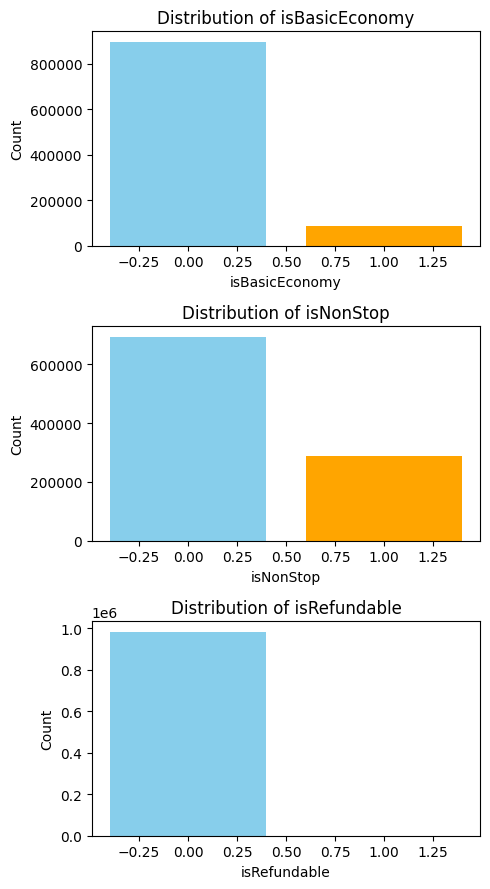

In [ ]:
features_to_visualize = ['isBasicEconomy', 'isNonStop', 'isRefundable']

# Set up subplots
fig, axes = plt.subplots(nrows=len(features_to_visualize), ncols=1, figsize=(5, 3 * len(features_to_visualize)))

# Create bar charts for each feature
for i, feature in enumerate(features_to_visualize):
    ax = axes[i]
    ax.bar(train_df[feature].value_counts().index, train_df[feature].value_counts().values, color=['skyblue', 'orange'])
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


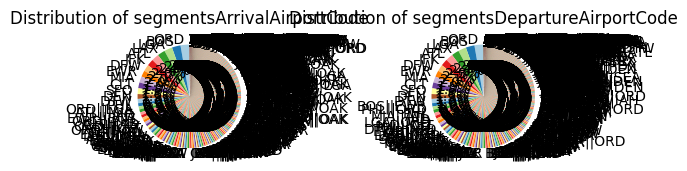

In [ ]:
import matplotlib.pyplot as plt

# Features to visualize
features_to_visualize = ['segmentsArrivalAirportCode', 'segmentsDepartureAirportCode']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(features_to_visualize), figsize=(6, 3))

# Create pie charts for each feature
for i, feature in enumerate(features_to_visualize):
    ax = axes[i]
    counts = train_df[feature].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


### Central Tendency Measure

In [ ]:
# Basic descriptions
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983821 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   searchDate                    983821 non-null  int64  
 1   flightDate                    983821 non-null  int64  
 2   startingAirport               983821 non-null  object 
 3   destinationAirport            983821 non-null  object 
 4   travelDuration                983821 non-null  int64  
 5   elapsedDays                   983821 non-null  int64  
 6   isBasicEconomy                983821 non-null  bool   
 7   isRefundable                  983821 non-null  bool   
 8   isNonStop                     983821 non-null  bool   
 9   baseFare                      983821 non-null  float64
 10  seatsRemaining                983821 non-null  int64  
 11  totalTravelDistance           983821 non-null  float64
 12  segmentsDepartureTimeRaw      983821 non-nu

# Numeric Features Summary

In [ ]:
from pandas import set_option
set_option('display.precision', 3)
train_df.describe()

,searchDate,flightDate,travelDuration,elapsedDays,baseFare,seatsRemaining,totalTravelDistance,segmentsAirlineCode
count,983821.000,983821.000,983821.000,983821.000,983821.000,983821.000,983821.000,983821.000
mean,738262.320,738287.891,410.297,0.141,311.814,6.028,1578.123,49.577
std,0.622,16.743,215.389,0.348,221.176,2.656,836.599,23.929
min,738261.000,738262.000,8.000,0.000,8.720,1.000,97.000,0.000
25%,738262.000,738272.000,246.000,0.000,169.300,4.000,872.000,24.000
50%,738262.000,738287.000,391.000,0.000,276.280,7.000,1398.000,47.000
75%,738263.000,738302.000,544.000,0.000,401.860,9.000,2353.000,73.000
max,738263.000,738322.000,1433.000,2.000,3531.160,10.000,3958.000,94.000


In [ ]:
# Check for empty/0 values
# Assuming 'train_df' is your DataFrame
numeric_columns = ['searchDate', 'flightDate', 'travelDuration', 'elapsedDays', 'baseFare', 'seatsRemaining', 'totalTravelDistance']

# Loop through each numeric column
for numeric_column in numeric_columns:
    # Count missing values
    missing_count = train_df[numeric_column].isnull().sum()

    # Count zeros
    zero_count = (train_df[numeric_column] == 0).sum()

    # Print warnings if missing values or zeros are present
    if missing_count > 0:
        print(f"Warning: {numeric_column} has {missing_count} missing values.")
    if zero_count > 0:
        print(f"Warning: {numeric_column} has {zero_count} zeros.")


In [ ]:
from pandas import set_option
set_option('display.precision', 3)

# List of features for analysis
features_to_analyze = ['searchDate', 'flightDate', 'travelDuration', 'elapsedDays', 'baseFare', 'seatsRemaining', 'totalTravelDistance']

for column in features_to_analyze:
  Summary = train_df[column].describe()

  # Extract minimum and maximum values
  Count = Summary['count']
  Mean = Summary['mean']
  STD = Summary['std']
  Min = Summary['min']
  Max = Summary['max']
  Q1 = Summary['25%']
  Q2 = Summary['50%']
  Q3 = Summary['75%']

  # Calculate the IQR
  IQR = Q3 - Q1

  # Calculate the range
  Range = Max - Min

  # Calculate the Variance
  Variance = STD**2

  # Extract the mode values (if there are multiple modes)
  Mode = train_df[column].mode()
  Modes = Mode.tolist()

  # Calculate the skew
  Skew = train_df[column].skew()

  # Print each statistic on a new line
  print(f"\nColumn: {column}")
  print(f"Count: {Count: .3f}")
  print(f"Mean: {Mean: .3f}")
  print(f"Mode: {Modes}")
  print(f"Standard Deviation: {STD: .3f}")
  print(f"Variance: {Variance: .3f}")
  print(f"Min: {Min: .3f}")
  print(f"Max: {Max: .3f}")
  print(f"25th Percentile (Q1): {Q1: .3f}")
  print(f"50th Percentile (Median, Q2): {Q2: .3f}")
  print(f"75th Percentile (Q3): {Q3: .3f}")
  print(f"IQR: {IQR: .3f}")
  print(f"Range: {Range: .3f}")
  print(f"Skew: {Skew: .3f}")



Column: searchDate
Count:  983821.000
Mean:  738262.320
Mode: [738262]
Standard Deviation:  0.622
Variance:  0.387
Min:  738261.000
Max:  738263.000
25th Percentile (Q1):  738262.000
50th Percentile (Median, Q2):  738262.000
75th Percentile (Q3):  738263.000
IQR:  1.000
Range:  2.000
Skew: -0.350

Column: flightDate
Count:  983821.000
Mean:  738287.891
Mode: [738271]
Standard Deviation:  16.743
Variance:  280.321
Min:  738262.000
Max:  738322.000
25th Percentile (Q1):  738272.000
50th Percentile (Median, Q2):  738287.000
75th Percentile (Q3):  738302.000
IQR:  30.000
Range:  60.000
Skew:  0.229

Column: travelDuration
Count:  983821.000
Mean:  410.297
Mode: [85]
Standard Deviation:  215.389
Variance:  46392.246
Min:  8.000
Max:  1433.000
25th Percentile (Q1):  246.000
50th Percentile (Median, Q2):  391.000
75th Percentile (Q3):  544.000
IQR:  298.000
Range:  1425.000
Skew:  0.554

Column: elapsedDays
Count:  983821.000
Mean:  0.141
Mode: [0]
Standard Deviation:  0.348
Variance:  0.121

# Class Distribution

In [ ]:
# List of target columns for class distribution
target_columns = ['startingAirport', 'destinationAirport', 'isBasicEconomy', 'isRefundable', 'isNonStop', 'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode', 'segmentsAirlineCode']

# Loop through each target column
for target_column in target_columns:
    # Calculate class distribution
    class_distribution = train_df[target_column].value_counts(normalize=True)

    # Print class distribution
    print(f"\nClass Distribution for {target_column}:")
    print(class_distribution)



Class Distribution for startingAirport:
LAX    0.097
LGA    0.079
BOS    0.073
SFO    0.072
CLT    0.067
DFW    0.066
ORD    0.066
MIA    0.066
ATL    0.062
DEN    0.058
PHL    0.058
DTW    0.054
JFK    0.051
EWR    0.049
IAD    0.045
OAK    0.038
Name: startingAirport, dtype: float64

Class Distribution for destinationAirport:
LAX    0.095
LGA    0.079
MIA    0.071
SFO    0.070
BOS    0.069
DFW    0.068
ORD    0.067
CLT    0.066
ATL    0.064
DEN    0.062
PHL    0.054
JFK    0.053
DTW    0.053
EWR    0.050
IAD    0.043
OAK    0.037
Name: destinationAirport, dtype: float64

Class Distribution for isBasicEconomy:
False    0.912
True     0.088
Name: isBasicEconomy, dtype: float64

Class Distribution for isRefundable:
False    1.000e+00
True     6.099e-06
Name: isRefundable, dtype: float64

Class Distribution for isNonStop:
False    0.706
True     0.294
Name: isNonStop, dtype: float64

Class Distribution for segmentsArrivalAirportCode:
ORD              2.739e-02
BOS              2.700e-02

# Correlation
numeric

In [ ]:
# Correlation Coefficient
from pandas import set_option
set_option('display.precision', 3)

correlation_matrix = train_df.corr()

print(correlation_matrix)

<ipython-input-5-5fcb27da7b0c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


                     searchDate  flightDate  travelDuration  elapsedDays  \
searchDate            1.000e+00       0.130       6.999e-03       -0.001   
flightDate            1.298e-01       1.000      -6.004e-03        0.010   
travelDuration        6.999e-03      -0.006       1.000e+00        0.366   
elapsedDays          -1.015e-03       0.010       3.662e-01        1.000   
isBasicEconomy        2.366e-02      -0.017      -7.074e-02        0.003   
isRefundable         -3.256e-03      -0.001      -8.442e-04       -0.001   
isNonStop             4.205e-03       0.035      -6.811e-01       -0.163   
baseFare             -2.432e-02       0.036       4.121e-01        0.147   
seatsRemaining        6.633e-02       0.197      -1.152e-01       -0.002   
totalTravelDistance  -5.603e-04      -0.011       6.993e-01        0.291   
segmentsAirlineCode   4.364e-03      -0.015       1.909e-01        0.058   

                     isBasicEconomy  isRefundable  isNonStop   baseFare  \
searchDate  

In [ ]:
# Covariance
from pandas import set_option
set_option('display.precision', 3)

covariance = train_df.cov()
print(covariance)

                     searchDate  flightDate  travelDuration  elapsedDays  \
searchDate            3.868e-01   1.352e+00       9.376e-01   -2.200e-04   
flightDate            1.352e+00   2.803e+02      -2.165e+01    6.125e-02   
travelDuration        9.376e-01  -2.165e+01       4.639e+04    2.749e+01   
elapsedDays          -2.200e-04   6.125e-02       2.749e+01    1.214e-01   
isBasicEconomy        4.162e-03  -8.103e-02      -4.310e+00    3.417e-04   
isRefundable         -5.001e-06  -4.711e-05      -4.490e-04   -8.626e-07   
isNonStop             1.191e-03   2.686e-01      -6.682e+01   -2.586e-02   
baseFare             -3.346e+00   1.318e+02       1.963e+04    1.130e+01   
seatsRemaining        1.096e-01   8.749e+00      -6.590e+01   -2.017e-03   
totalTravelDistance  -2.915e-01  -1.592e+02       1.260e+05    8.482e+01   
segmentsAirlineCode   6.495e-02  -5.943e+00       9.841e+02    4.840e-01   

                     isBasicEconomy  isRefundable  isNonStop   baseFare  \
searchDate  

<ipython-input-45-c282b44d9011>:5: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance = train_df.cov()



# Chi-Squared Tests
categorical variables

In [ ]:
from scipy.stats import chi2_contingency

# Assuming 'train_df' is your DataFrame
categorical_columns = ['startingAirport', 'destinationAirport', 'isBasicEconomy', 'isRefundable', 'isNonStop', 'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode', 'segmentsAirlineCode']

# Loop through each pair of categorical columns
for i, column1 in enumerate(categorical_columns):
    for j, column2 in enumerate(categorical_columns):
        if i < j:  # Avoid redundant comparisons
            # Create a contingency table
            contingency_table = pd.crosstab(train_df[column1], train_df[column2])

            # Perform the chi-squared test
            chi2, p, dof, expected = chi2_contingency(contingency_table)

            # Print the results
            print(f"\nChi-squared test for {column1} vs {column2}:")
            print(f"Chi2 value: {chi2}")
            print(f"P-value: {p}")
            print(f"Degrees of Freedom: {dof}")

            # Check for dependence or independence based on the p-value
            alpha = 0.05  # significance level
            if p < alpha:
                print("The two categorical variables are dependent (reject the null hypothesis).")
            else:
                print("The two categorical variables are independent (fail to reject the null hypothesis).")



Chi-squared test for startingAirport vs destinationAirport:
Chi2 value: 146359.4723337091
P-value: 0.0
Degrees of Freedom: 225
The two categorical variables are dependent (reject the null hypothesis).

Chi-squared test for startingAirport vs isBasicEconomy:
Chi2 value: 22429.850799394255
P-value: 0.0
Degrees of Freedom: 15
The two categorical variables are dependent (reject the null hypothesis).

Chi-squared test for startingAirport vs isRefundable:
Chi2 value: 26.049781763996886
P-value: 0.03750266873303642
Degrees of Freedom: 15
The two categorical variables are dependent (reject the null hypothesis).

Chi-squared test for startingAirport vs isNonStop:
Chi2 value: 37629.542305254945
P-value: 0.0
Degrees of Freedom: 15
The two categorical variables are dependent (reject the null hypothesis).

Chi-squared test for startingAirport vs segmentsArrivalAirportCode:
Chi2 value: 2606104.6937245
P-value: 0.0
Degrees of Freedom: 46770
The two categorical variables are dependent (reject the nul

# Visualization

array([[<Axes: title={'center': 'searchDate'}>,
        <Axes: title={'center': 'flightDate'}>,
        <Axes: title={'center': 'travelDuration'}>],
       [<Axes: title={'center': 'elapsedDays'}>,
        <Axes: title={'center': 'baseFare'}>,
        <Axes: title={'center': 'seatsRemaining'}>],
       [<Axes: title={'center': 'totalTravelDistance'}>, <Axes: >,
        <Axes: >]], dtype=object)

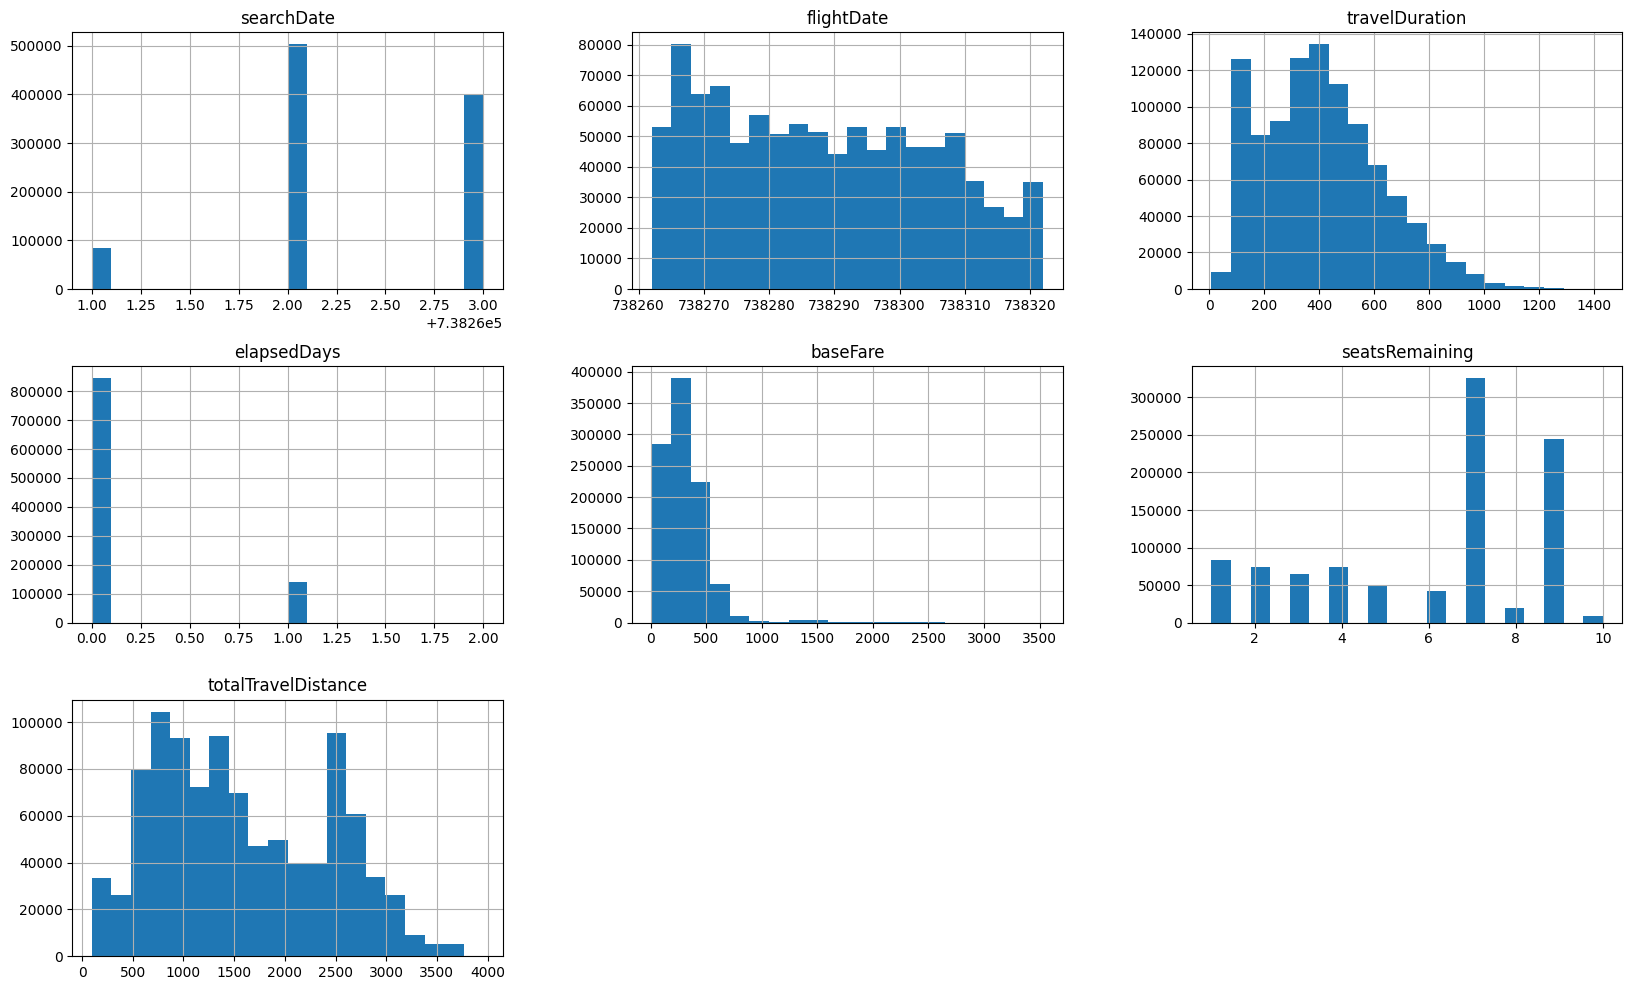

In [ ]:
# Histogram
train_df[['searchDate', 'flightDate', 'travelDuration', 'elapsedDays', 'baseFare', 'seatsRemaining', 'totalTravelDistance']].hist(bins=20, figsize=(20, 12))

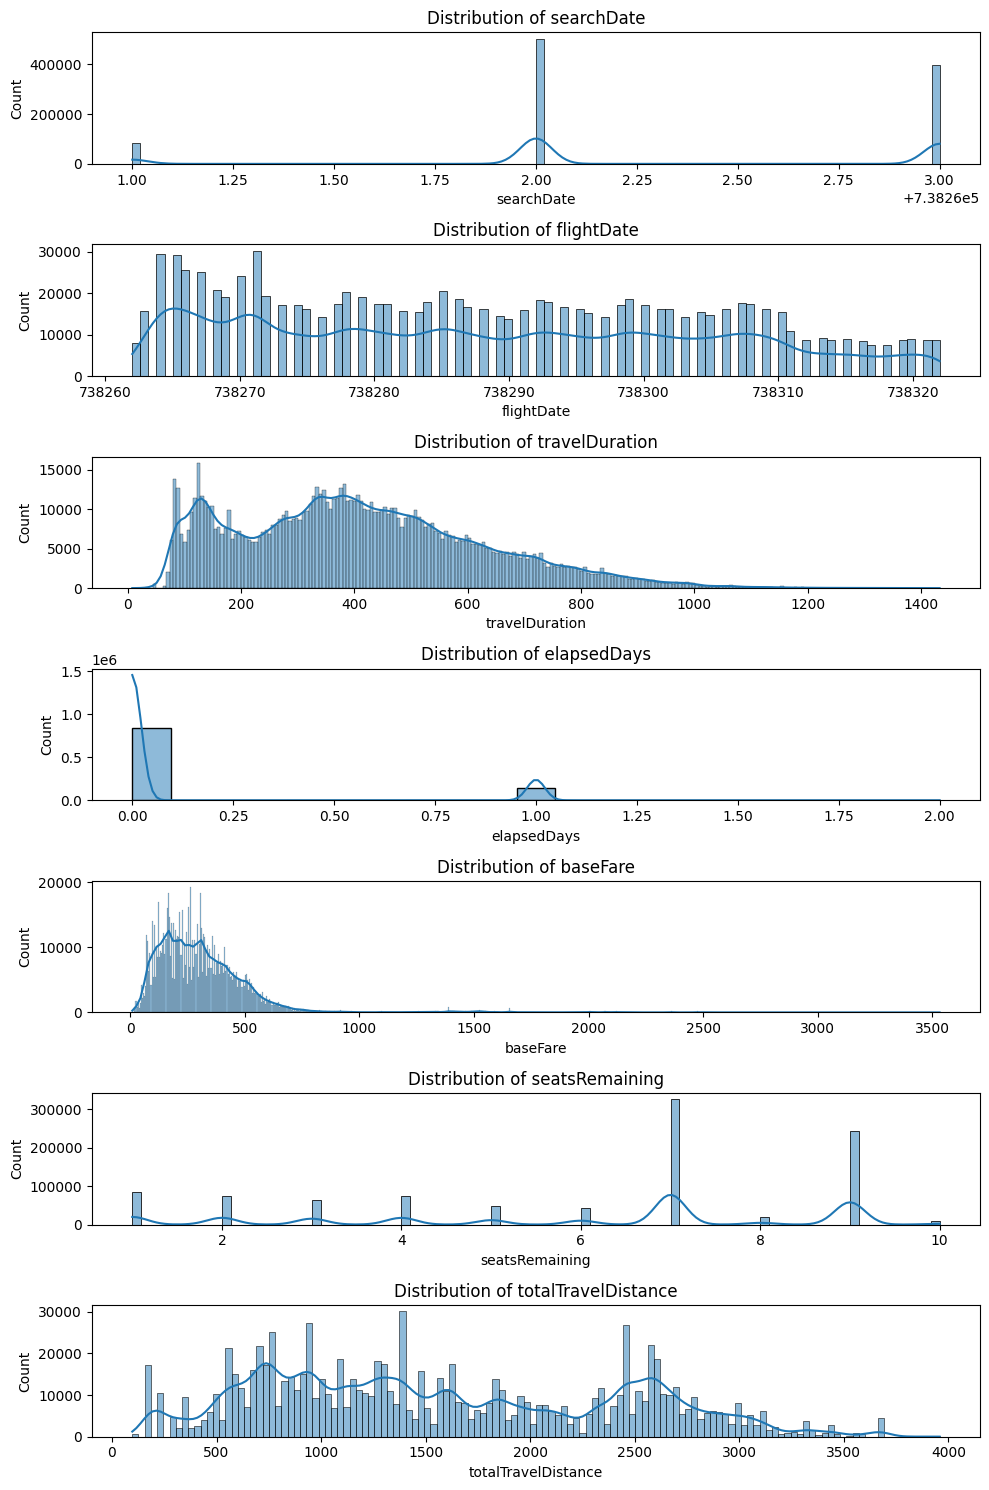

In [ ]:
# Kernel Density Estimation
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest
columns_of_interest = ['searchDate', 'flightDate', 'travelDuration', 'elapsedDays', 'baseFare', 'seatsRemaining', 'totalTravelDistance']

# Create subplots
fig, axes = plt.subplots(nrows=len(columns_of_interest), figsize=(10, 15))

# Loop through each column and create a KDE plot
for i, column in enumerate(columns_of_interest):
    sns.histplot(data=train_df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


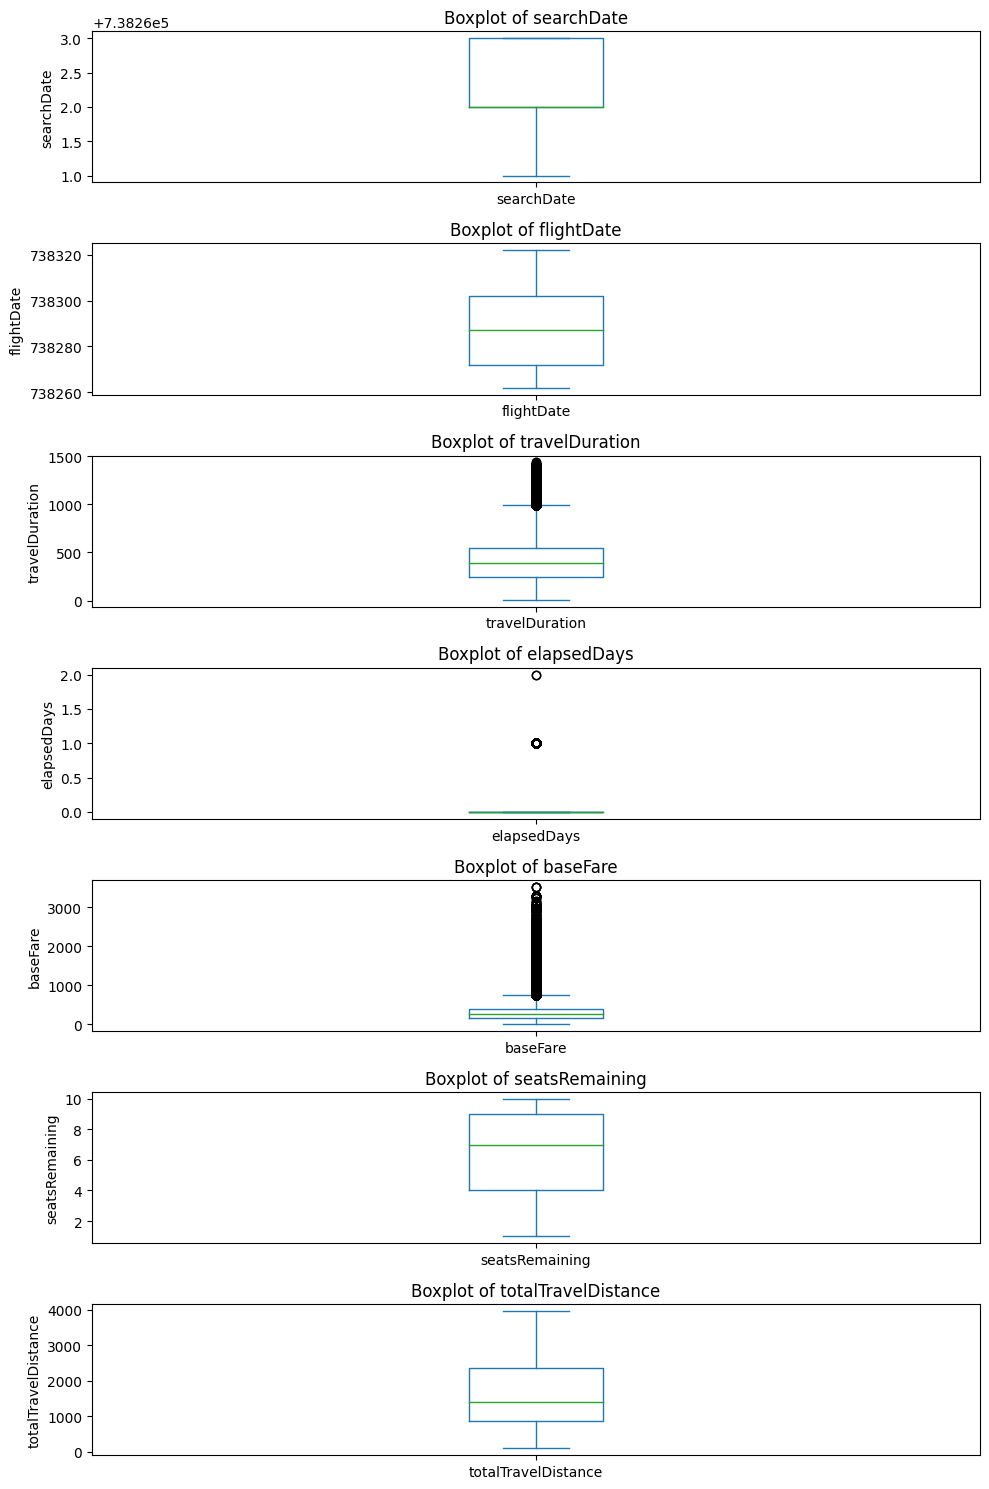

In [ ]:
# Boxplots
# Select the columns of interest
columns_of_interest = ['searchDate', 'flightDate', 'travelDuration', 'elapsedDays', 'baseFare', 'seatsRemaining', 'totalTravelDistance']

# Create subplots
fig, axes = plt.subplots(nrows=len(columns_of_interest), figsize=(10, 15))

# Loop through each column and create a vertical boxplot
for i, column in enumerate(columns_of_interest):
    train_df[[column]].plot(kind='box', ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()


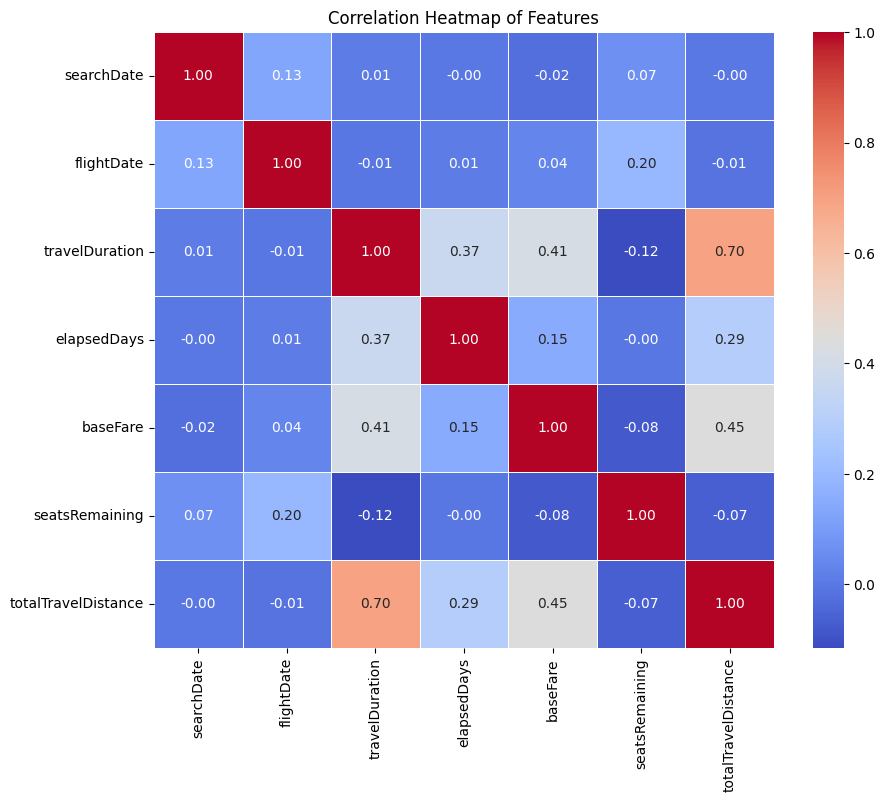

In [ ]:
# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest
columns_of_interest = ['searchDate', 'flightDate', 'travelDuration', 'elapsedDays', 'baseFare', 'seatsRemaining', 'totalTravelDistance']

# Calculate the correlation matrix
correlation_matrix = train_df[columns_of_interest].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()


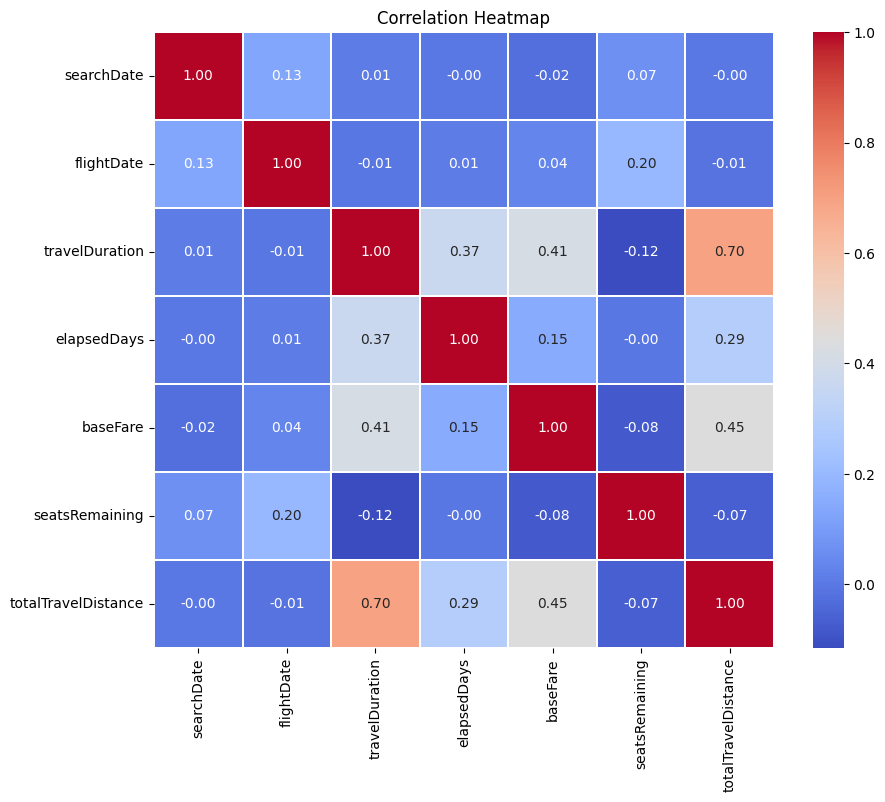

In [ ]:
# full correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.3)
plt.title('Correlation Heatmap')
plt.show()

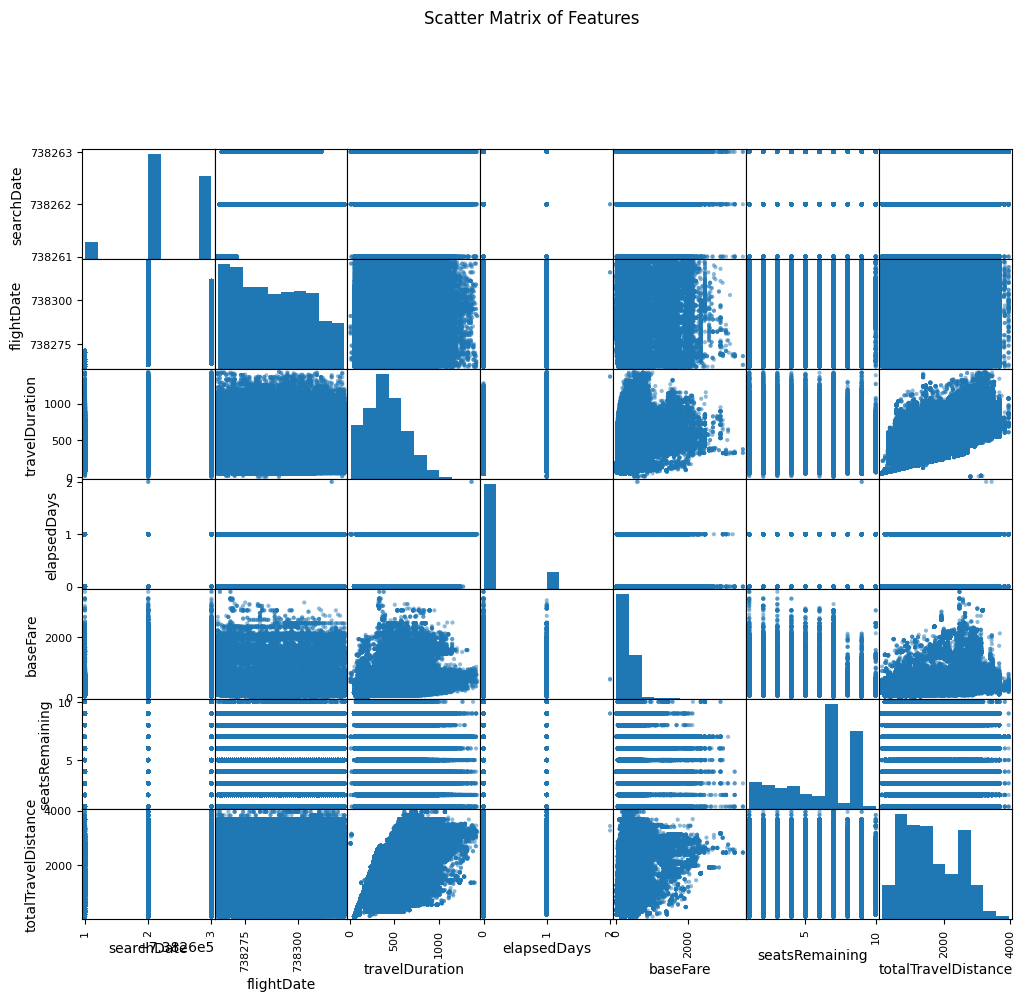

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Select the columns of interest
columns_of_interest = ['searchDate', 'flightDate', 'travelDuration', 'elapsedDays', 'baseFare', 'seatsRemaining', 'totalTravelDistance']

# Create a scatter matrix
scatter_matrix(train_df[columns_of_interest], figsize=(12, 10), diagonal='hist', alpha=0.5)
plt.suptitle('Scatter Matrix of Features', y=1.02)
plt.show()


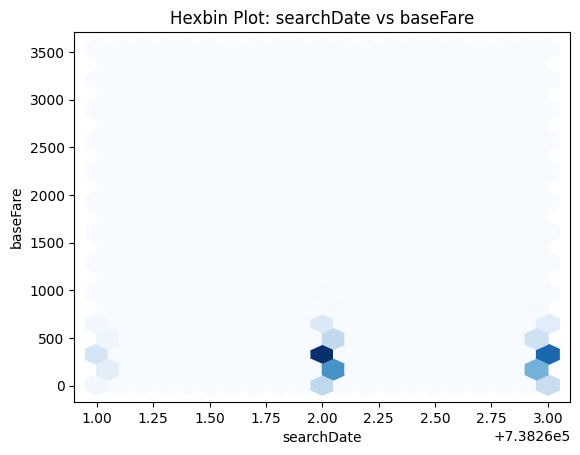

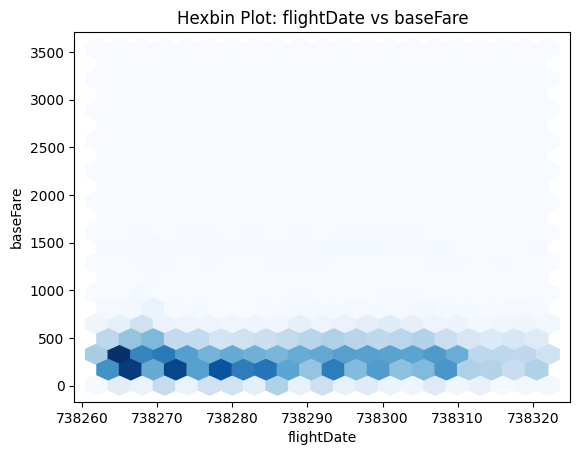

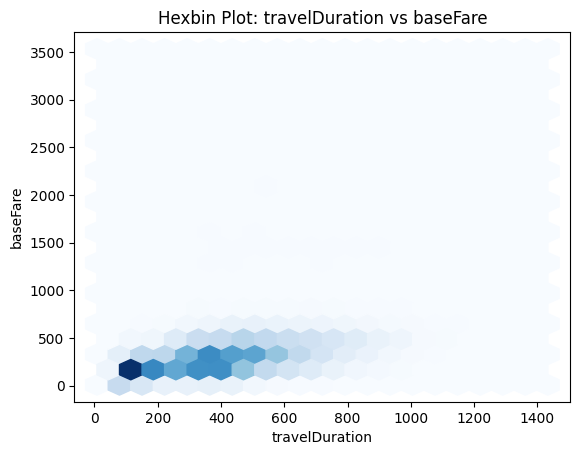

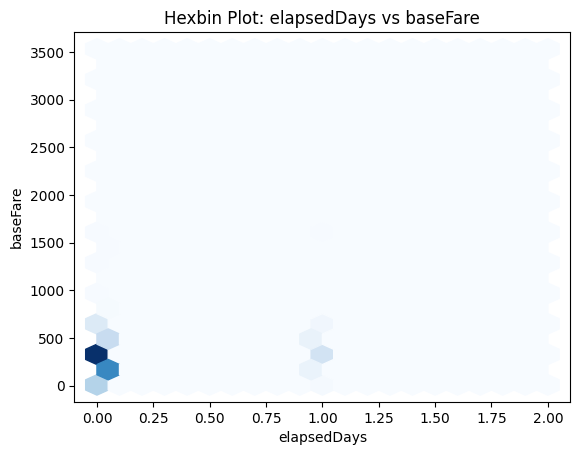

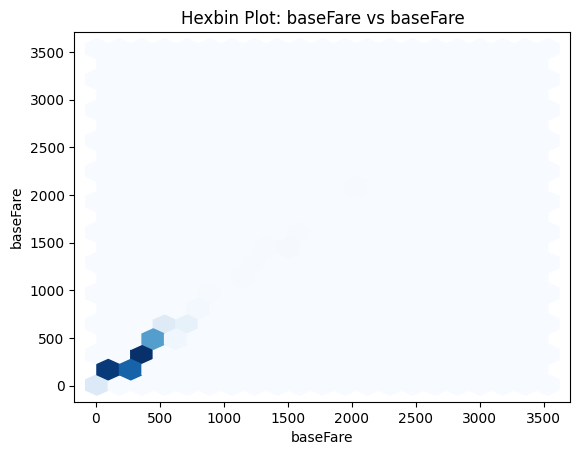

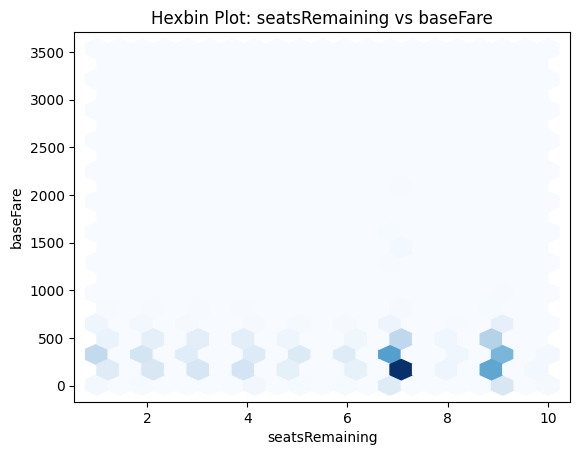

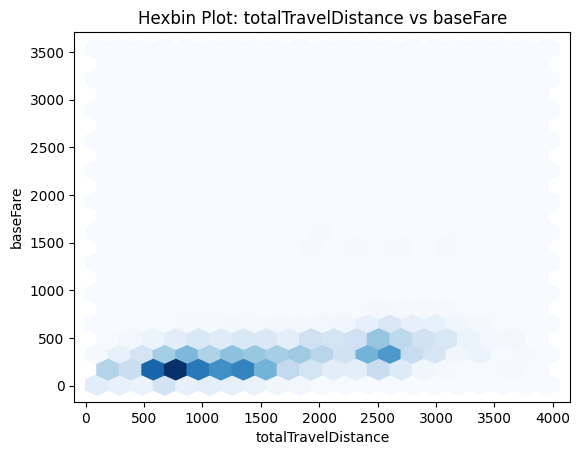

In [ ]:
# Hexbin
# Select the columns of interest
columns_of_interest = ['searchDate', 'flightDate', 'travelDuration', 'elapsedDays', 'baseFare', 'seatsRemaining', 'totalTravelDistance']

# Create separate hexbin plots for each feature
for column in columns_of_interest:
    train_df.plot(x=column, y='baseFare', kind='hexbin', gridsize=20, cmap='Blues', colorbar=False)
    plt.title(f'Hexbin Plot: {column} vs baseFare')
    plt.xlabel(column)
    plt.ylabel('baseFare')
    plt.show()
